# COGS 108 - EDA Checkpoint

# Names

- Helin Ergun
- Maricela Vasquez
- Sathvik Kaliyur
- Kalaina Anderes
- Nicholas Yamashita

<a id='research_question'></a>
# Research Question

Temporally and geographically, we measured as a team how slang (words & terms) originated from popular songs and integrated within everyday language, through Tweets. Beginning from the release date and searching Twitter slang for year 2019, we graphed and measured the increase in Twitter slang usage, geographic spread in U.S. counties, prevalence, and based upon this information made inferences about this correlated relationship. 

**Abstract:**
How do viral music hits (defined by Spotify Top 50 most popular rated) spread (how it propogates from one point to another) into the American Population? In specified music spreads, we analyzed the rate of spread over time during 2019, and what music genres tend to spread primarily due to their urbanization value (government urbanization index) in addition to college education rate (% of people with bachelors degree or higher).

# Setup

In [1]:
## YOUR CODE HERE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from scipy.stats import mannwhitneyu


# Data Cleaning

Describe your data cleaning steps here.

Merging the 52 CSV's that we had to hand download from SpotifyCharts.com. We also had to make an Automator script to rename all the CSV files to songs_1...songs_52, so that we could efficently read-in the CSV's

In [3]:
import pandas as pd


csv_list = []

i = 2

while i <= 52:
    csv_list.append(f'songs_{i}.csv')
    i = i + 1

print(csv_list)



df_master = pd.read_csv('master.csv')


for file in csv_list:
    df = pd.read_csv(file)
    df.to_csv('master.csv', mode = 'a', header = False, index=False)


['songs_2.csv', 'songs_3.csv', 'songs_4.csv', 'songs_5.csv', 'songs_6.csv', 'songs_7.csv', 'songs_8.csv', 'songs_9.csv', 'songs_10.csv', 'songs_11.csv', 'songs_12.csv', 'songs_13.csv', 'songs_14.csv', 'songs_15.csv', 'songs_16.csv', 'songs_17.csv', 'songs_18.csv', 'songs_19.csv', 'songs_20.csv', 'songs_21.csv', 'songs_22.csv', 'songs_23.csv', 'songs_24.csv', 'songs_25.csv', 'songs_26.csv', 'songs_27.csv', 'songs_28.csv', 'songs_29.csv', 'songs_30.csv', 'songs_31.csv', 'songs_32.csv', 'songs_33.csv', 'songs_34.csv', 'songs_35.csv', 'songs_36.csv', 'songs_37.csv', 'songs_38.csv', 'songs_39.csv', 'songs_40.csv', 'songs_41.csv', 'songs_42.csv', 'songs_43.csv', 'songs_44.csv', 'songs_45.csv', 'songs_46.csv', 'songs_47.csv', 'songs_48.csv', 'songs_49.csv', 'songs_50.csv', 'songs_51.csv', 'songs_52.csv']


Scrapes Genius.com for lyrics. We got the top 50 viral songs for each week from SpotifyCharts.com into CSV format. We merged all 52 CSV's detailed in the last checkpoint. For scraping lyrics from Genius.com we used the LyricsGenius library. We search the artists then the specific song. For here we use a try except because some of the songs were not found and would throw an error and stop the program. Then dump to a JSON file each loop just incase an unforeseen error would occur and we had to run again and could start from the last data point.

**Partially cleans the lyrics data, removes a few things like \n, - (this isn't finished as we are still cleaning) For this we used Regex or I guess re more specifically.** We will continue to clean the data by removing stop words and more symbols from the lyric data.

In [ ]:
import lyricsgenius
import json

# Client Access Token
token = "t19ZRmG1y5jaY-LjD1SEFdLuTB0dDiwQab4SNxWIofs7g8XHt6uJLCX8bnd-dow1"

genius = lyricsgenius.Genius(token)
genius.response_format = 'plain'


# open json file that is in the same directory
with open('master_json.json') as f:
    # load json data into a python object
    data = json.load(f)


# loop through each song/artist and fins lyrics then append to JSON obj
for tweets in data['tweets']:

    try:
        content_artist = tweets['Artist']
        content_track = tweets['Track Name']

        artist = genius.search_artist(f"{content_artist}", max_songs=1, sort="title", include_features=True)
        song = artist.song(f"{content_track}")


        print(song.lyrics)

        tweets['Lyrics'] = song.lyrics

        # Save
        with open('master_lyrics_added.json', 'w') as f:
            json.dump(data, f, indent = 2)
    except:
        continue


**Transforms the CSV to JSON**


**Genius returns a bunch of data features we don't need, so part of cleaning we removed a bunch of values. ( The Key says tweets becuase Code was reused from the twitter scraper)**

**Education Data** data source: https://data.ers.usda.gov/reports.aspx?ID=17829

In [ ]:
import re
import json
import pandas as pd



# open json file that is in the same directory
with open('master_lyrics_added.json') as f:
    # load json data into a python object
    data = json.load(f)


# remove the "\n"
for tweets in data['tweets']:

    try:
        content = tweets["Lyrics"]

        # regex
        pattern = r'\n'
        mod_string = re.sub(pattern, ' ', content)

        # append ack to JSON
        tweets['Lyrics'] = mod_string

    except:
        continue


# remove the "-"
for tweets in data['tweets']:

    try:
        content = tweets["Lyrics"]

        # regex
        pattern = r'-'
        mod_string = re.sub(pattern, ' ', content)

        # append ack to JSON
        tweets['Lyrics'] = mod_string

    except:
        continue


# remove the "\"
for tweets in data['tweets']:

    try:
        content = tweets["Lyrics"]

        # regex
        pattern = r"'\u2005'"
        mod_string = re.sub(pattern, ' ', content)

        # append ack to JSON
        tweets['Lyrics'] = mod_string

    except:
        continue




with open('ns_removed.json', 'w') as f:
    json.dump(data, f, indent = 2)

In [3]:
education = pd.read_csv("Education - EducationReport (1) (1).csv")
education.dropna(axis='rows')
education.head()
education.describe()


,ID,Urban,1970,1980,1990,2000,2019
count,3150.000000,3144.000000,3124.000000,3132.000000,3137.00000,3140.000000,3141.000000
mean,30357.680000,5.010496,0.073854,0.115172,0.13562,0.165685,0.220032
std,15196.317985,2.708130,0.039748,0.054530,0.06567,0.077995,0.095490
min,1001.000000,1.000000,0.000000,0.020000,0.04000,0.050000,0.000000
25%,18171.500000,2.000000,0.050000,0.080000,0.09000,0.110000,0.150000
50%,29174.000000,6.000000,0.060000,0.100000,0.12000,0.150000,0.200000
75%,45082.500000,7.000000,0.090000,0.130000,0.16000,0.190000,0.260000
max,56045.000000,9.000000,0.390000,0.480000,0.53000,0.640000,0.780000


Above Cleaning discussed in Checkpoint 1 

In [ ]:
import csv
import json

csvfile = open('master.csv', 'r')
jsonfile = open('master_json.json', 'w')



fieldnames = ('Position', 'Track Name', 'Artist')
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile, indent=4)
    jsonfile.write(',\n')


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [ ]:
import pandas as pd
import json




# open json file that is in the same directory
with open('lyrics.json') as f:
    # load json data into a python object
    data = json.load(f)
# loop through 'tweets' looking for certin keys
for tweets in data['tweets']:
    #print(tweets['like count'], tweets['url'])
    del tweets['_type']
    del tweets['annotation_count']
    del tweets['api_path']
    del tweets['full_title']
    del tweets['header_image_thumbnail_url']
    del tweets['header_image_url']
    del tweets['id']
    del tweets['instrumental']
    del tweets['lyrics_owner_id']
    del tweets['lyrics_state']
    del tweets['lyrics_updated_at']
    del tweets['path']
    del tweets['pyongs_count']
    del tweets['song_art_image_thumbnail_url']
    del tweets['song_art_image_url']
    del tweets['stats']
    #del tweets[]['unreviewed_annotations']
    #del tweets['hot']
    #del tweets['pageviews']
    del tweets['title_with_featured']
    del tweets['updated_by_human_at']
    del tweets['url']
    del tweets['primary_artist']
    del tweets['artist']





with open('lyrics_update.json', 'w') as f:
    json.dump(data, f, indent = 2)


This graph takes the distribution of urban index scores vs college education rate for every state that had a significant relationship between the two factors. There are no outliers. However no consistent trends into what is causing signficance in each state. Generally, they are negativley correlated, where the higher the score, the lower the college rate, but that does not hold for every state. We learn that the states that do have signifcant correlation between these two variables see a negative relationship. 

In [4]:


part = education['State'].unique().tolist()
corr_dict = {}
for i in part:
    df = education[(education.State == i)]
    #sns.barplot(x="Urban",y="2019",data = df)
    column_1 = df['Urban']
    column_2 = df["2019"]
    correlation = column_1.corr(column_2)
    if(abs(correlation)>.5):
        corr_dict[i] = correlation
corr_dict



{'AZ': -0.644198450561376,
 'DE': -0.9819805060619659,
 'FL': -0.693125708919179,
 'IL': -0.6081781815286073,
 'IA': -0.5025715436322338,
 'KY': -0.5247632846113541,
 'LA': -0.5023898833058986,
 'MN': -0.5398804218671762,
 'MO': -0.5126084092310675,
 'NV': -0.7154305124884399,
 'NH': -0.6866602359893941,
 'OH': -0.6155267375487595,
 'OR': -0.5375637988389662,
 'PA': -0.6332817560391005,
 'SC': -0.5221860133909334,
 'UT': -0.5076112874167206,
 'VA': -0.50102078748295,
 'WI': -0.559527667738753}

Text(0.5, 1.0, 'Singifcant Urban College Correlations')

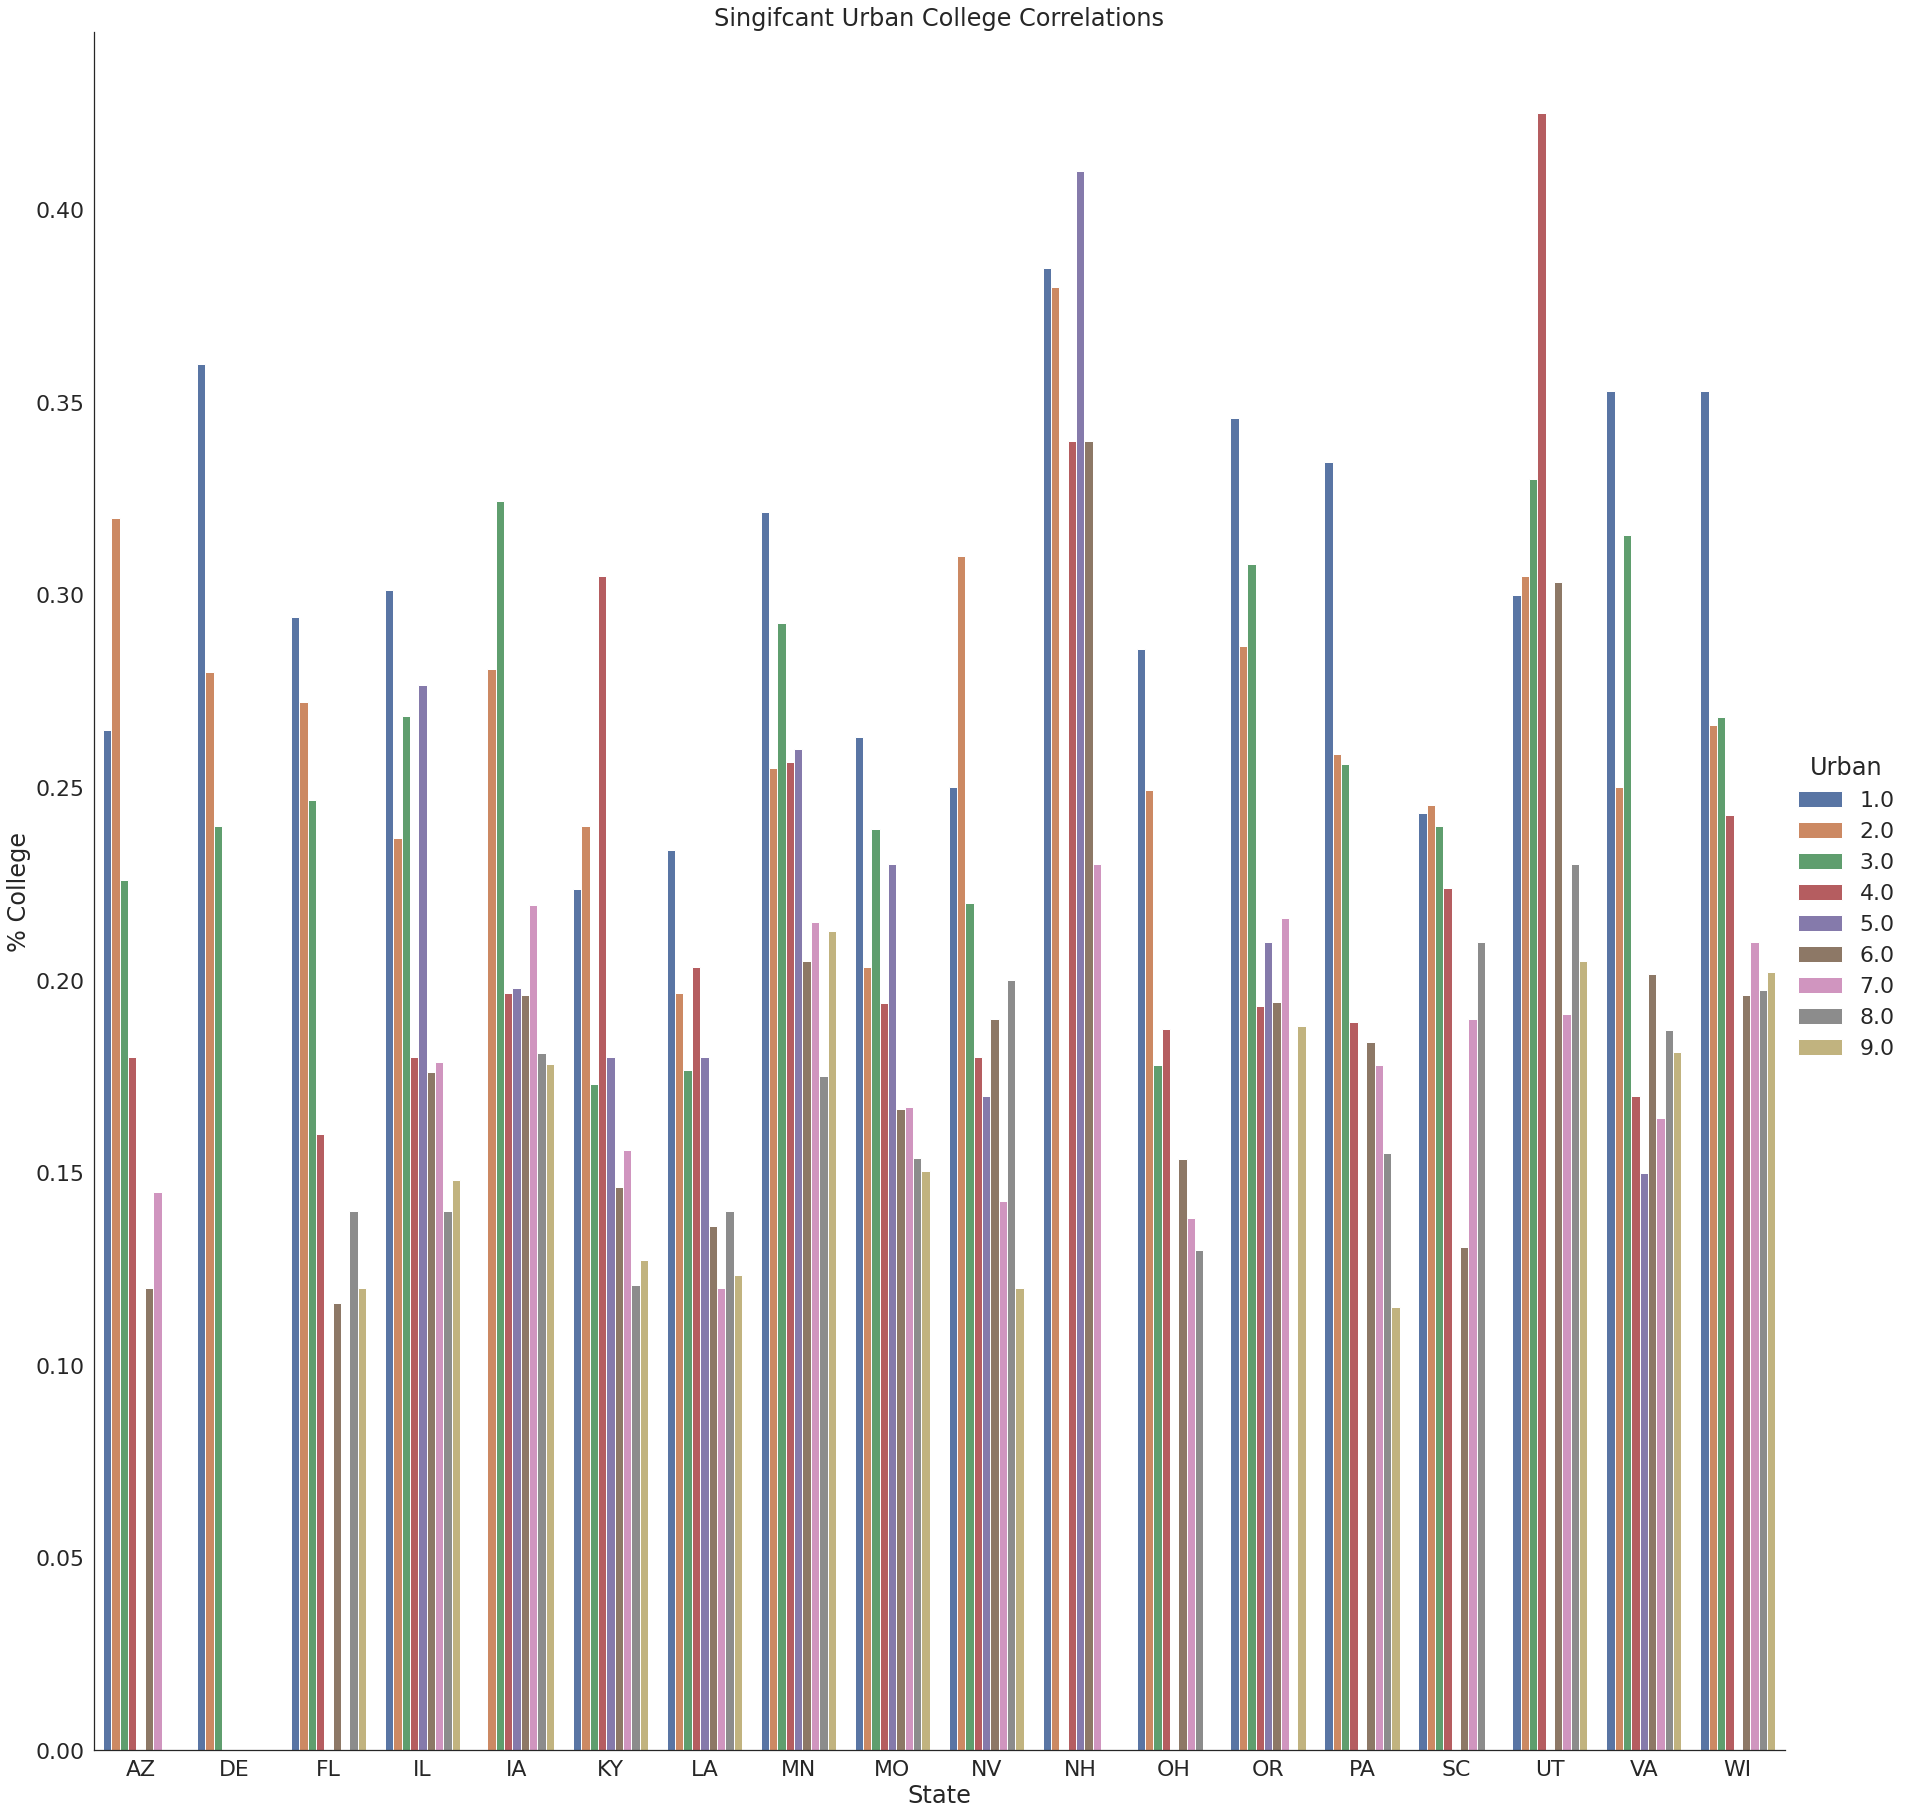

In [5]:
listy = corr_dict.keys()
df2 = education[education['State'].isin(listy)]
df2
g = sns.catplot(
    data=df2, kind="bar",
    x="State", y="2019",hue = 'Urban',height=25,ci = None)

plt.ylabel("% College")
plt.title("Singifcant Urban College Correlations")

This graph takes the college education rates of the least college educated counties in the country by urbanization index. There are no outliers, and no consistent relationship either. All of the counties plotted have Index scores greater than 4, but there is still signifcant variation after that. This graph allows us to get a general understanding of the types of counties at the bottom of the college education spectrum and learn taht these counties are generally in more rural comunities. 

Text(0.5, 1.0, 'Least College Educated')

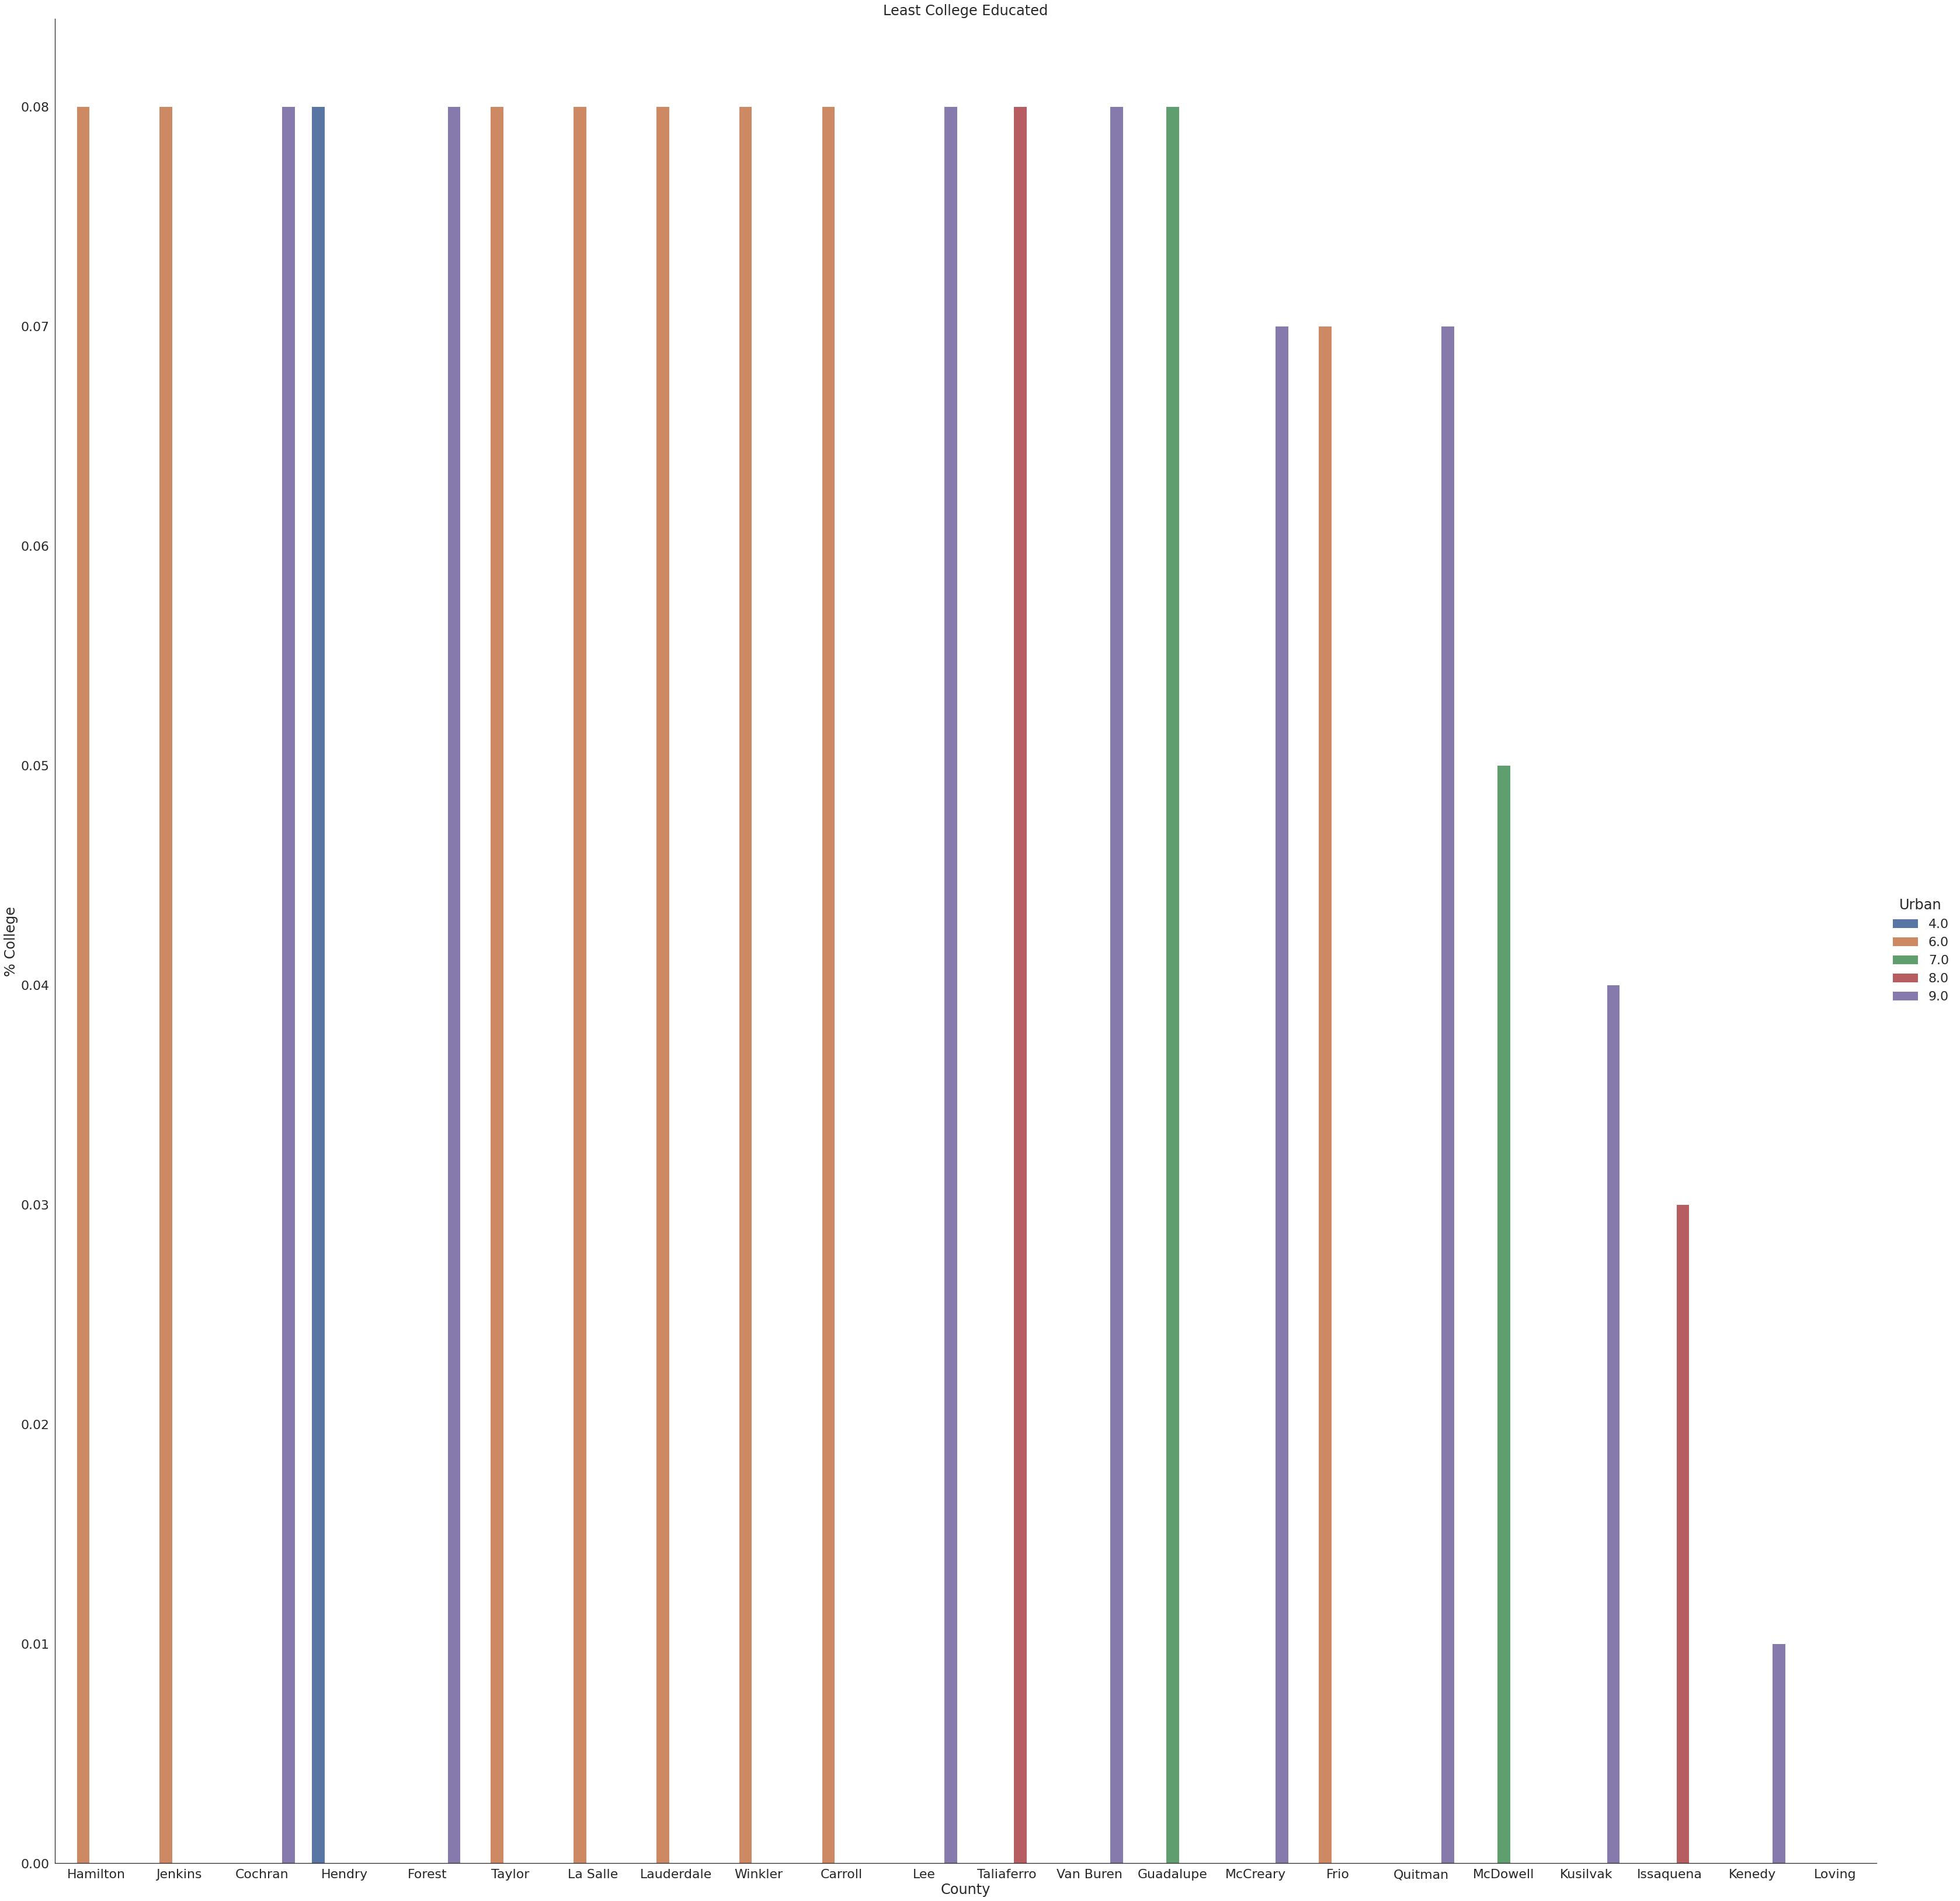

In [6]:
df = education.sort_values(by=['2019'],ascending=False)
df = df[df['2019']<=.08]
part = df['County'].unique().tolist()
g = sns.catplot(
    data=df, kind="bar",
    x="County", y="2019",height=45,hue = 'Urban', ci = None)
plt.ylabel("% College")
plt.title("Least College Educated")

This graph takes the college education rates of the most college educated counties in the country by urabnization index. There are no outliers, and it seems that the vast majority of these counties have an urbanization index of 1, but other urban index scores appear on the graph as well distorting any potnetial correlation. This graph allows us to vizualize that many of the top counties are in major metropolitan areas like New York or DC. 

Text(0.5, 1.0, 'Most College Educated')

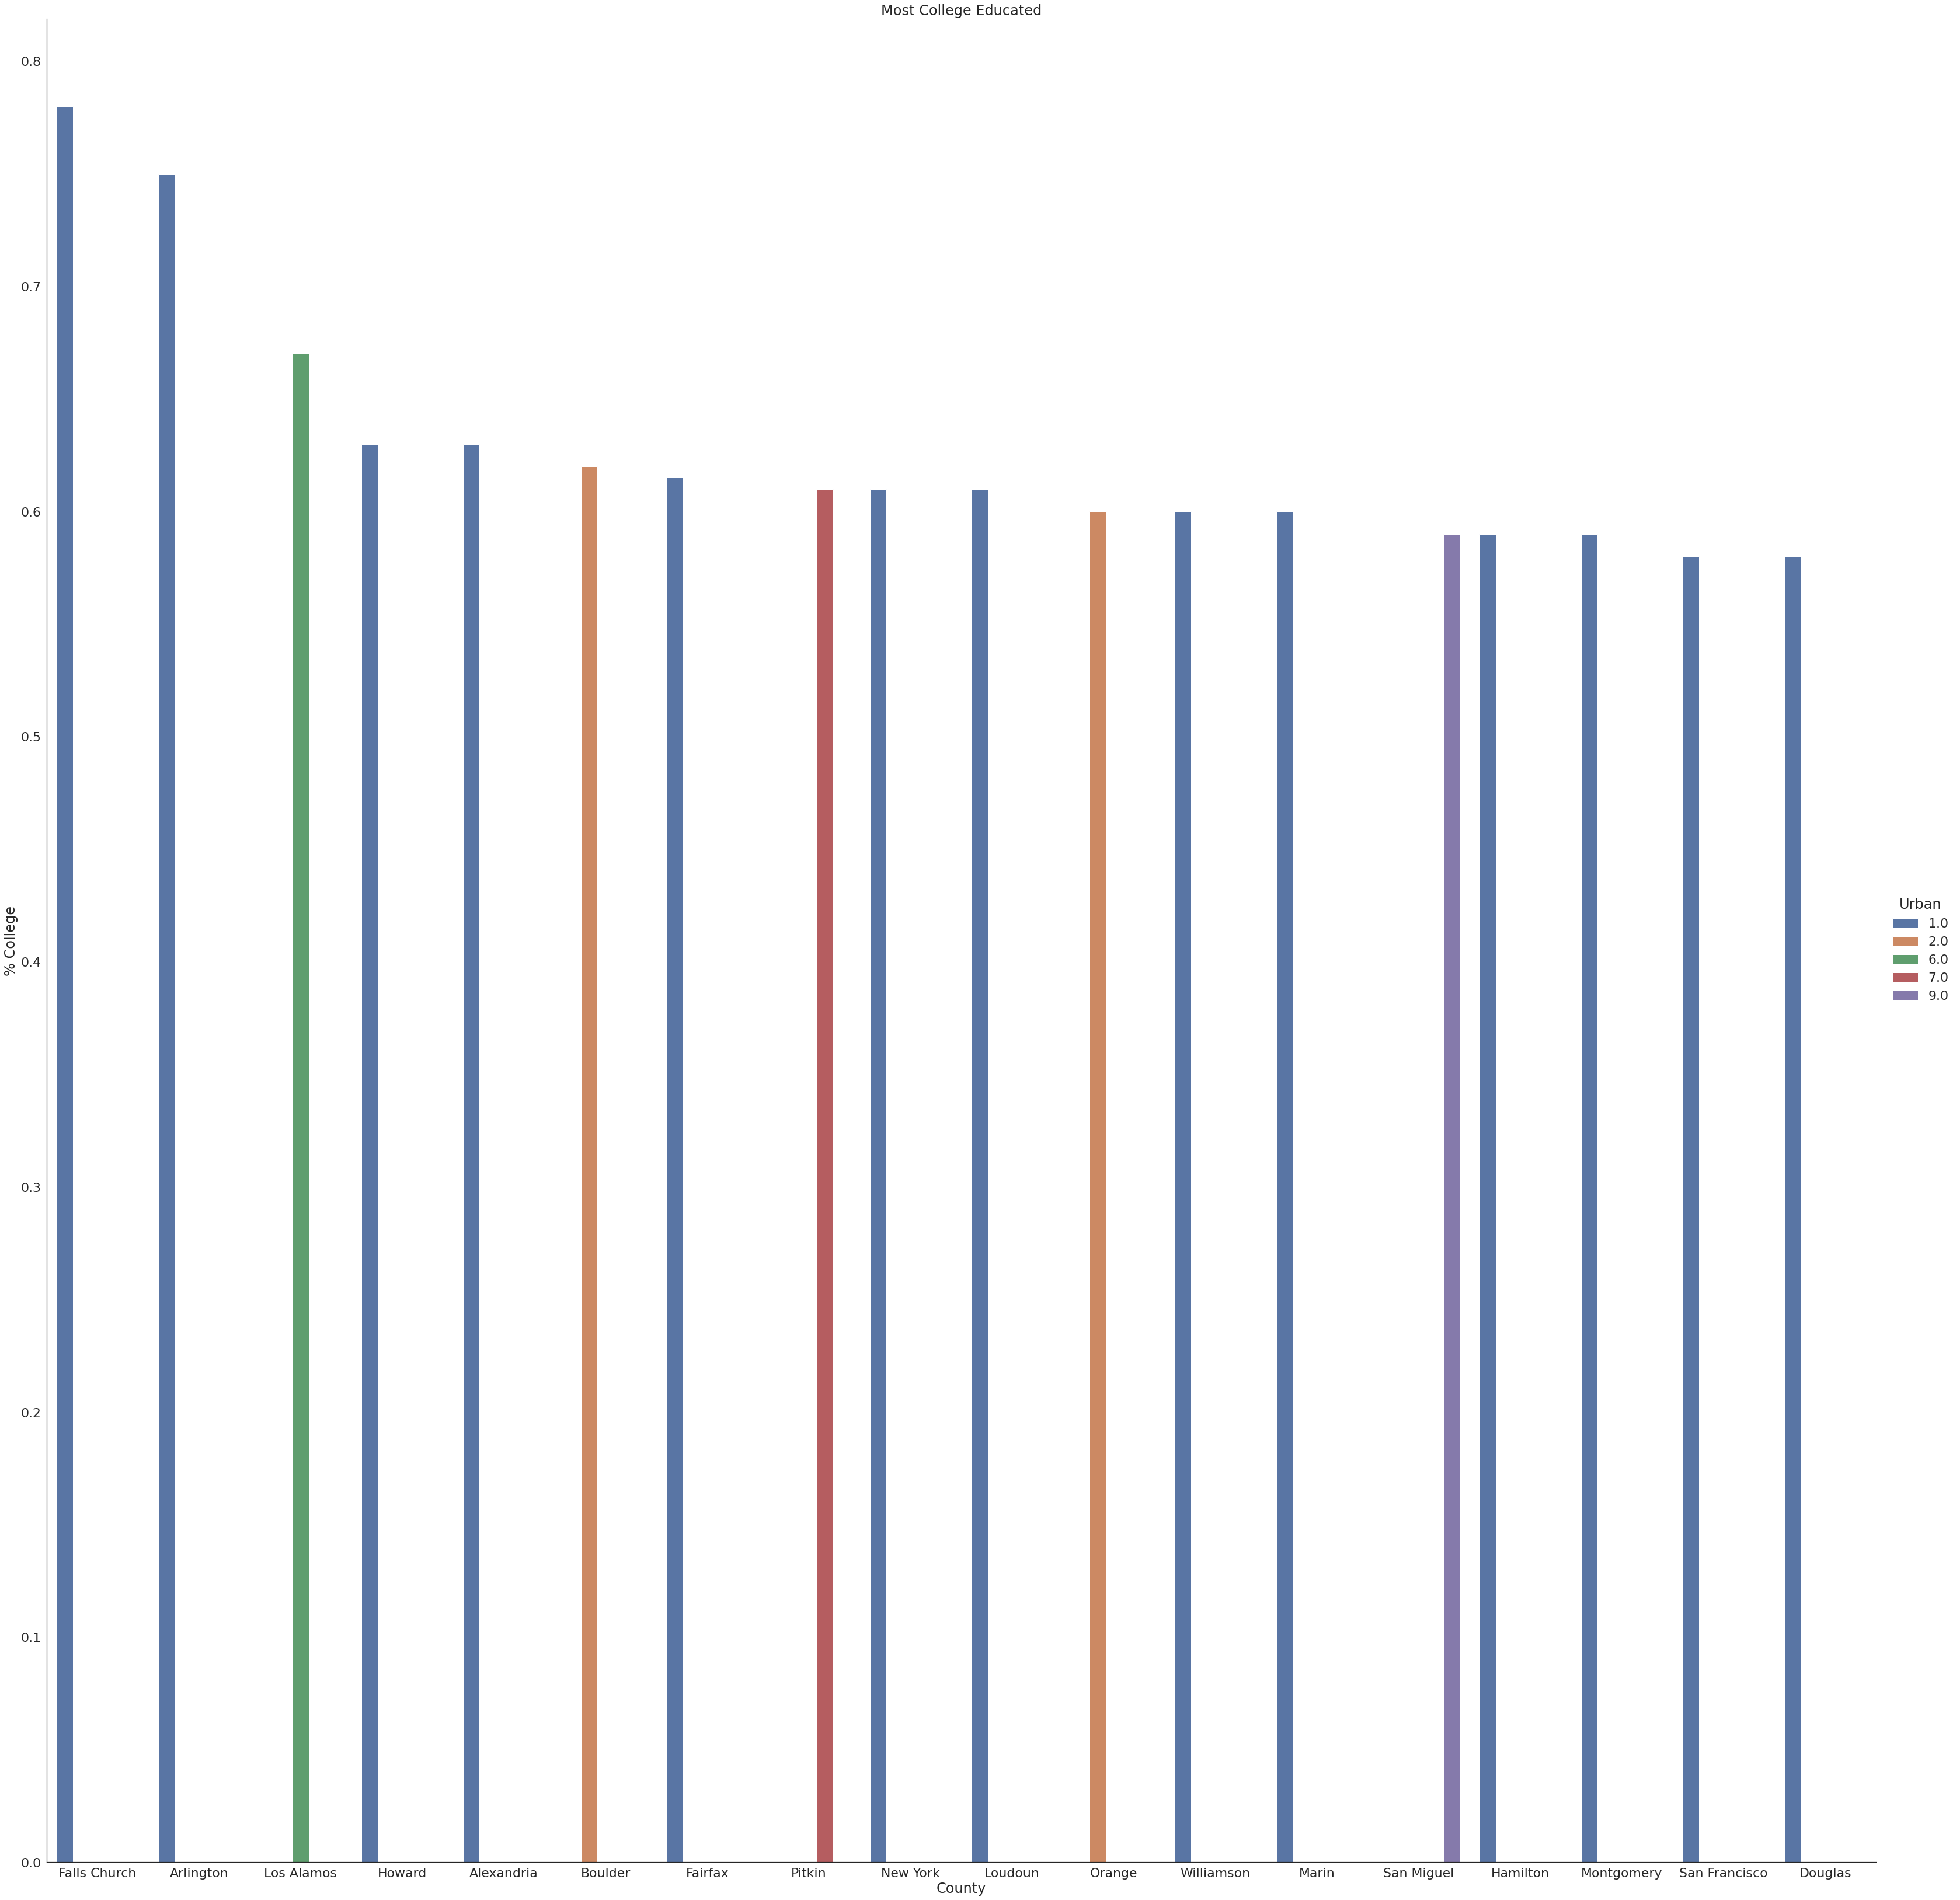

In [7]:


df = education.sort_values(by=['2019'],ascending=False)
df = df[df['2019']>=.58]
part = df['County'].unique().tolist()
g = sns.catplot(
    data=df, kind="bar",
    x="County", y="2019",height=45,hue = 'Urban', ci = None)
plt.ylabel("% College")
plt.title("Most College Educated")



This graph takes in the college education rates of the 75th, 50th, and 25th percentile of counties in terms of 2019 college education rate. There are no outliers, but this graph shows that thoguh all these categories increased overtime, the 75th percentile increased the most with the largest growth rate. This shows that like many other aspects of American society, the most educated counties have been becoming more and more educated, where as the rest of the country is progressing a lot slower. 

Text(0.5, 1.0, 'College Education Overtime')

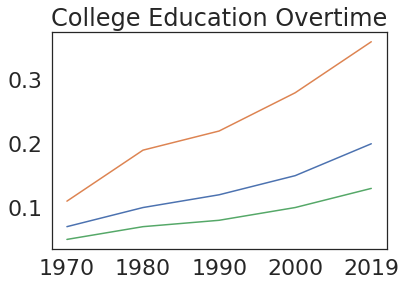

In [8]:
#sns.histplot(x="2019",data = education,bins =5,color='grey')
df2 = education[education['2019']<=.15]
df = education[education['2019']>=.3]
df3 = education[education['2019']<.3]
df3 = df3[df3['2019']>.15]
med_list = []
e_list = []
n_list = []
year_list = ['1970','1980','1990','2000','2019']
for i in year_list:
    med_list.append(df3[i].median())
for i in year_list:
    e_list.append(df[i].median())
for i in year_list:
    n_list.append(df2[i].median())
med_list
sns.lineplot(x=year_list,y=med_list)
sns.lineplot(x=year_list,y=e_list)
sns.lineplot(x=year_list,y=n_list)
plt.title("College Education Overtime")

This graph takes in the college education rate for every county as a histogram. The data is clearly skewed right, with a few highly educated counties in the tail of the distrbution. There is no relationship that one can extrapolate soley based on the graph as it is a univariate histogram, but it does show how college education rates are distributed acorss all of America's counties.

Text(0.5, 1.0, 'College Education Distribution')

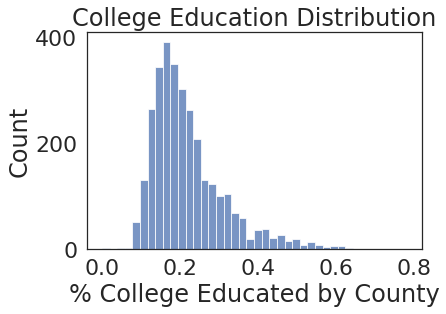

In [9]:
p = sns.histplot(x="2019",data =education,bins = 40)
plt.xlabel("% College Educated by County")
p.set_title("College Education Distribution")

This graph looks at urban index scores by college education rate across all counties in the country. There do not seem to be major outliers, and no clear relationship. Generally, college education rates decrease as urban index score increases, but that is not unviersally true. However, counties with an urban index score of 1.0 tend to have significantly larger college rates than other counties. This graph lets us grasp the general trend of how education and urbanness interact with each other

Text(0.5, 1.0, '% College by Urban Index')

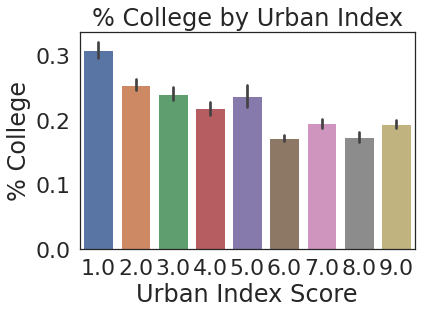

In [10]:


p= sns.barplot(x="Urban",y="2019",data = education)
p.set_xlabel("Urban Index Score")
p.set_ylabel("% College")
p.set_title("% College by Urban Index")



This graph analyzes the distribtuion of college education rates by time period examing the distribtuion in 1970, 1980, 1990, 2000, and 2019. Each distribution is more evenly distributed then their predeccsor, with 1970 heavily peaking close to 0%, while 2019 has a much lower peak at near 20%. The datasets are normally distirbuted for each year examined so there are outliers at the edges. But overall, this data shows that the country has been becoming more educated over time. And the wider level of distribution indicates a level of new vairation in level of change, and a less uniform distribtuion at large. This graph allows us to see how the college education in America has changed overtime.

Text(0.5, 1.0, 'College Education Trends')

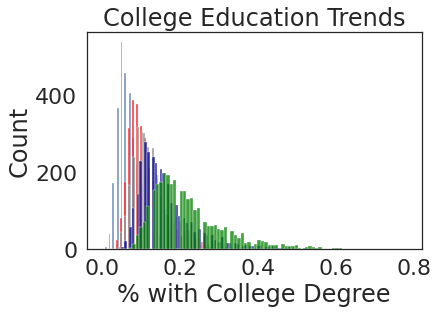

In [11]:
sns.histplot(x="1970",data = education,bins =90)
sns.histplot(data=education, x="1980",bins = 90, color="red")
sns.histplot(data=education, x="1990",bins = 90, color="grey")
sns.histplot(data=education, x="2000",bins = 90, color="darkblue")
sns.histplot(data=education, x="2019",bins = 90, color="green")
plt.xlabel("% with College Degree")
plt.ylabel("Count")
plt.title("College Education Trends")

In [12]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION